# VISUALIZATIONS FOR DESI ELG

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/mehdi/github/LSSutils')
import LSSutils.lab as lab
from LSSutils.catalogs.datarelease import cols_dr8_ccdts, fixlabels
import matplotlib.backends.backend_pdf

camb is not installed!


# MEAN DENSITY

In [4]:
plt.rc('font', family='serif', size=14)

In [7]:
columns = fixlabels(cols_dr8_ccdts, addunit=True)
for i, c in enumerate(columns):
    print(c, i)

ebv [mag] 0
log(HI/cm$^{2}$)  1
nstar [deg$^{-2}$] 2
depth-r [mag] 3
depth-g [mag] 4
depth-z [mag] 5
fwhm-r [arcsec] 6
fwhm-g [arcsec] 7
fwhm-z [arcsec] 8
airmass-r  9
airmass-g  10
airmass-z  11
skymag-r [mag/arcsec$^{2}$] 12
skymag-g [mag/arcsec$^{2}$] 13
skymag-z [mag/arcsec$^{2}$] 14
exptime-r [sec] 15
exptime-g [sec] 16
exptime-z [sec] 17
mjd-r [day] 18
mjd-g [day] 19
mjd-z [day] 20
galdepth-g [mag] 21
galdepth-r [mag] 22
galdepth-z [mag] 23
psfsize-g [arcsec] 24
psfsize-r [arcsec] 25
psfsize-z [arcsec] 26
ebv* [mag] 27
stardens [deg$^{-2}$] 28


In [8]:
systematics = {'decaln':[0, 1, 2, 5, 8, 11, 13, 15], # nstar, depth-rz (one band), fwhm-rgz (one band), airmass-rgz (one band), skymag-g, exptime r + logHI and ebv
               'decals':[0, 1, 2, 5, 8, 11, 13, 15], #ebv, logHI, nstar, depth-rzg (one band), fwhm-rgz (one band), airmass-rgz (one band), mjd-rg, (one band), exptime-rgz (one band)
               'bmzls':[0, 1, 2, 5, 8, 11, 17, 19]}

working on eboss
working on decaln
working on decals
working on bmzls
done!


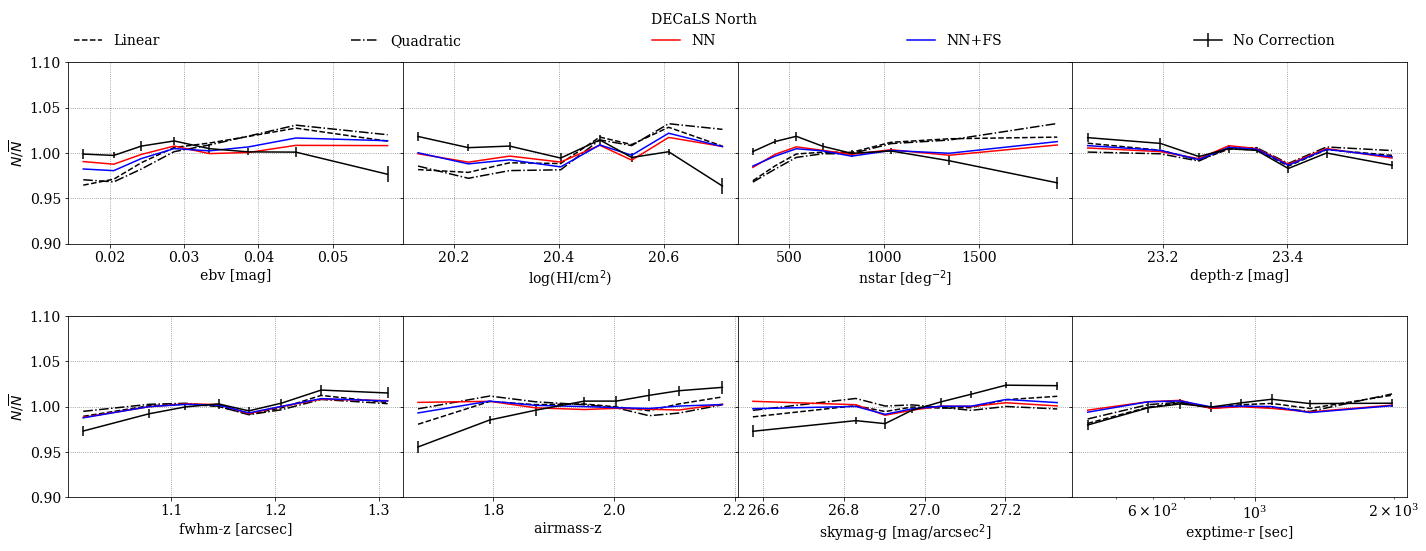

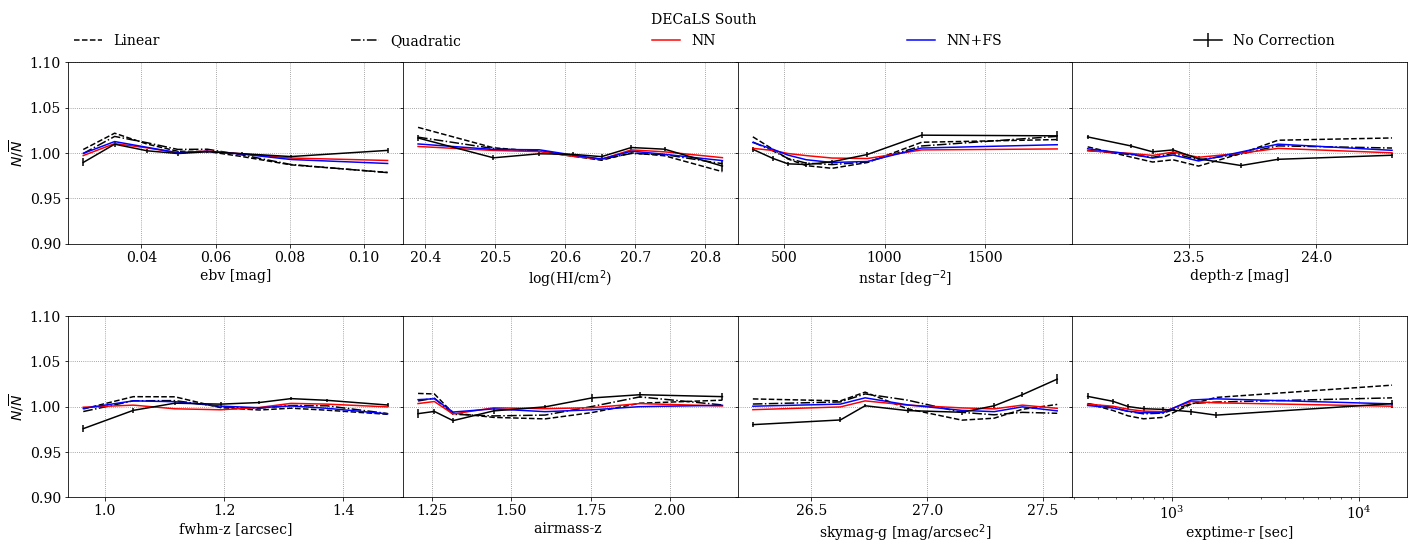

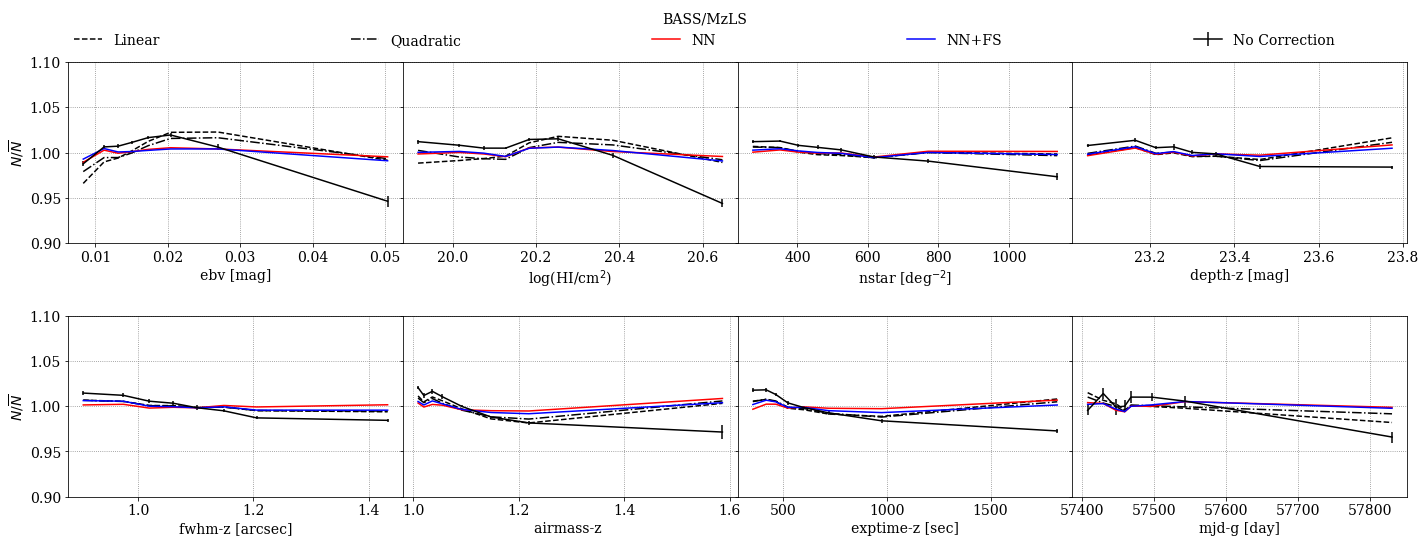

In [23]:
nnbar = lambda s,r,t,m:f'/B/Shared/mehdi/formehdi/0.4/clustering/nnbar_{s}_{r}_{t}_{m}.npy'


pdfname = 'nnbar_eboss_v0p4.pdf'
surveys = ['eboss'] # 'desi', 
regions = ['decaln', 'decals', 'bmzls']
templates = ['ccd'] # , 'ts'

models = ['uni', 'lin', 'quad', 'nn', 'nn-ab']

colors = {'uni':'k',
          'lin':'k',
          'quad':'k',
          'nn':'r',
          'nn-ab':'b'}

linestyles = {'uni':'-',
              'lin':'--',
              'quad':'-.',
              'nn':'-',
              'nn-ab':'-'}

labels = {'uni':'No Correction',
          'lin':'Linear',
          'quad':'Quadratic',
          'nn':'NN',
          'nn-ab':'NN+FS'}

regions_dic = {'decaln':'DECaLS North',
              'decals':'DECaLS South',
              'bmzls':'BASS/MzLS'}

def addnnbar(nnbar_list, ax, adderror=False, axes=None, **kwargs):
    
    if axes is None:
        axes = np.arange(len(nnbar_list))
        
    for i, ix in enumerate(axes):
        
        nnbar_i = nnbar_list[ix]
        
        if adderror:
            ax[i].errorbar(nnbar_i['bin_avg'],
                           nnbar_i['nnbar'],
                           yerr=nnbar_i['nnbar_err'], **kwargs)
        else:
            ax[i].plot(nnbar_i['bin_avg'],
                       nnbar_i['nnbar'], **kwargs)

            
pdf = matplotlib.backends.backend_pdf.PdfPages(pdfname)  

pdf_i = 0

for i, sur in enumerate(surveys):
    print(f'working on {sur}')
    
    for j, reg in enumerate(regions):
        print(f'working on {reg}')
        
        for k, temp in enumerate(templates):

            # --- set up the plot
            fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24, 8),
                                  sharey=True)
            fig.subplots_adjust(hspace=0.4, wspace=0.0)
            ax = ax.flatten()

            # plot mean density vs systematics
            for m, mod in enumerate(models):
                nnbar_m = np.load(nnbar(sur, reg, temp, mod), allow_pickle=True)
                
                adderror = True if mod=='uni' else False
                
                addnnbar(nnbar_m, ax, adderror=adderror, color=colors[mod],
                        ls=linestyles[mod], label=labels[mod], axes=systematics[reg])

            #--- cosmetics    
            # add x-axes labels
            for m, ix in enumerate(systematics[reg]):
                
                ax[m].set_ylim(0.9, 1.1)
                ax[m].set_xlabel(columns[ix])
                ax[m].grid(True, ls=':', color='grey')
                ax[m].locator_params(tight=True, nbins=5)
                
                if ix in [15]: # make exptime-r log-scale
                    ax[m].set_xscale('log')
                
                if m%4==0:ax[m].set_ylabel(r'$N/\overline{N}$')
                
            # legend    
            #title = ' '.join([sur, reg, temp])
            #title = title.upper()
            title = ' '.join([regions_dic[reg]])
            
            ax[0].legend(ncol=5,frameon=False,
                        bbox_to_anchor=(0, 1.05, 3.8, 0.4), loc="lower left",
                        mode="expand", borderaxespad=0,
                        title=title)
                
            #fig.delaxes(ax[-1])    
            pdf.savefig((pdf_i+1), bbox_inches='tight')
            pdf_i += 1
            
pdf.close()      
print('done!')
plt.show()

# Correlation Matrix

In [24]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp

sys.path.insert(0, '/home/mehdi/github/LSSutils')
import LSSutils.lab as lab

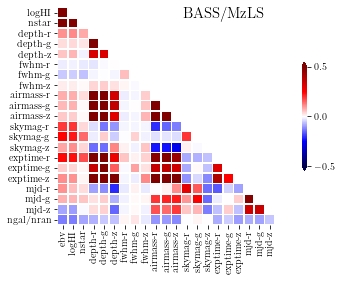

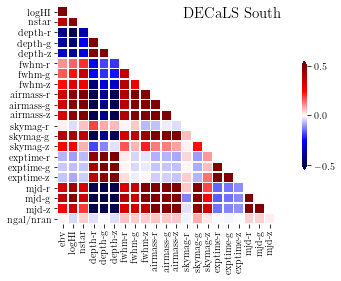

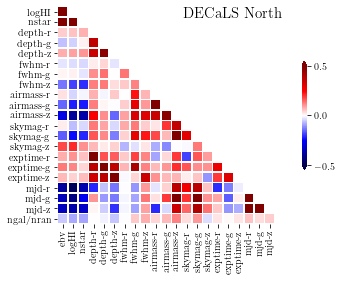

In [27]:
columns = lab.datarelease.cols_dr8_ccd
xlabels = lab.datarelease.fixlabels(columns, addunit=False)

df = pd.read_hdf('/home/mehdi/data/templates/dr8pixweight-0.32.0_combined256.h5')[columns]
df['ngal/nran'] = 0
dfnumpy = df.to_numpy()

kw = {'verbose':False}
ngal = hp.read_map('/B/Shared/mehdi/formehdi/dr8_elgsv_ngal_pix_0.32.0-colorbox.hp.256.fits', **kw)
frac = hp.read_map('/B/Shared/mehdi/formehdi/dr8_frac_pix_0.32.0-colorbox.hp.256.fits', **kw)

masks = {}
masks['bmzls'] = hp.read_map('/B/Shared/mehdi/formehdi/dr8_mask_eboss_bmzls_pix_0.32.0-colorbox.hp.256.fits', **kw) > 0
masks['decals'] = hp.read_map('/B/Shared/mehdi/formehdi/dr8_mask_eboss_decals_pix_0.32.0-colorbox.hp.256.fits', **kw) > 0 
masks['decaln'] = hp.read_map('/B/Shared/mehdi/formehdi/dr8_mask_eboss_decaln_pix_0.32.0-colorbox.hp.256.fits', **kw) > 0 

nnbar = {}
nnbar['nnbar_bmzls'] = lab.utils.overdensity(ngal, frac, masks['bmzls']) + 1
nnbar['nnbar_decals'] = lab.utils.overdensity(ngal, frac, masks['decals']) + 1
nnbar['nnbar_decaln'] = lab.utils.overdensity(ngal, frac, masks['decaln']) + 1

corrs = {}
for region in ['bmzls', 'decals', 'decaln']:
    df_region = dfnumpy.copy()
    df_region[:,-1] = nnbar[f'nnbar_{region}']    
    
    corrs[region] = lab.utils.corrmatrix(df_region[masks[region], :], 
                                         estimator='pearsonr')    
    del df_region

    
cbar_label = {'bmzls':'BASS/MzLS',
             'decals':'DECaLS South',
             'decaln':'DECaLS North'}
for region in corrs:
    corr_reg = corrs[region]

    pdfname = f'pcorr_{region}.pdf'    
    lab.dataviz.plot_corrmax(corr_reg, cbar_label[region], xlabels, pdfname)

# Selected maps

In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp

sys.path.insert(0, '/home/mehdi/github/LSSutils')
import LSSutils.lab as lab


from glob import glob

camb is not installed!


In [14]:
plt.rc('font', family='serif', size=15)

In [2]:
labels = lab.catalogs.datarelease.cols_dr8_ccd
labels = lab.catalogs.datarelease.fixlabels(labels, addunit=False)

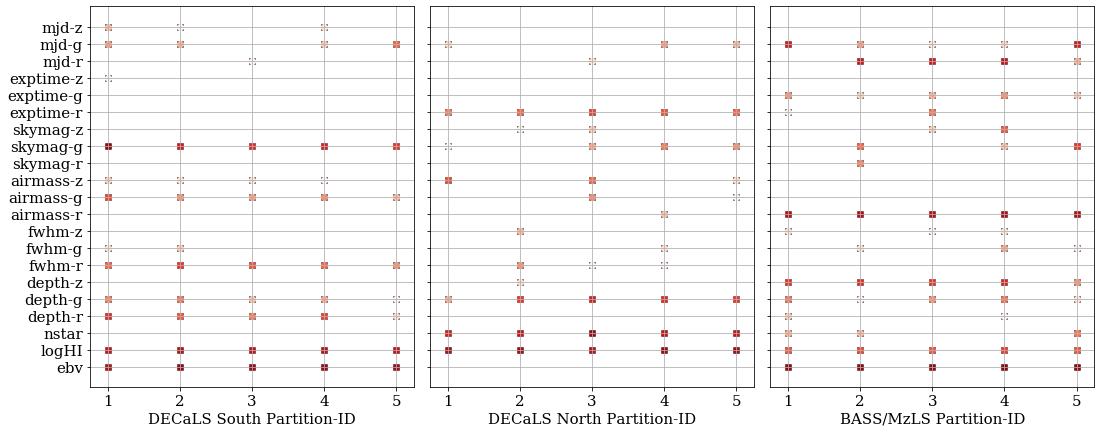

In [16]:
regions = {'decals':'DECaLS South',
           'decaln':'DECaLS North',
           'bmzls':'BASS/MzLS'}
path ='/home/mehdi/data/formehdi/0.4/'
fig, ax = plt.subplots(ncols=3, nrows=1, 
                       figsize=(18, 7), sharex=True, sharey='row')
fig.subplots_adjust(wspace=0.05)
ax = ax.flatten()

i = 0
for tmplt in [ 'ccd']: # ngc.all
    
    for key in ['decals','decaln', 'bmzls']:

        lab.dataviz.get_selected_maps(glob(f'{path}ablation_{key}_{tmplt}/d8elgsv_{tmplt}_{key}.log_fold*.npy'),
                                      [regions[key]],
                                      labels=labels, 
                                      ax=ax[i], hold=True)
        i += 1
plt.savefig('maps_selected_ccd_v0p4.pdf', bbox_inches='tight')
# plt.show()

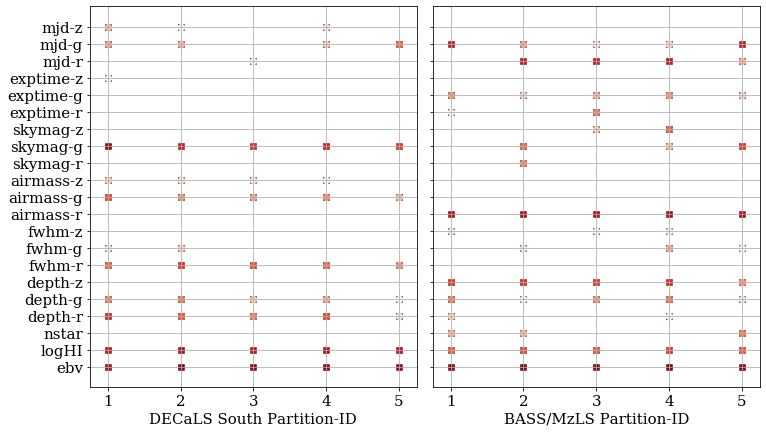

In [17]:
regions = {'decals':'DECaLS South',
           'decaln':'DECaLS North',
           'bmzls':'BASS/MzLS'}
path ='/home/mehdi/data/formehdi/0.4/'
fig, ax = plt.subplots(ncols=2, nrows=1, 
                       figsize=(12, 7), sharex=True, sharey='row')
fig.subplots_adjust(wspace=0.05)
ax = ax.flatten()

i = 0
for tmplt in [ 'ccd']: # ngc.all
    
    for key in ['decals', 'bmzls']:

        lab.dataviz.get_selected_maps(glob(f'{path}ablation_{key}_{tmplt}/d8elgsv_{tmplt}_{key}.log_fold*.npy'),
                                      [regions[key]],
                                      labels=labels, 
                                      ax=ax[i], hold=True)
        i += 1
plt.savefig('maps_selected_ccd_v0p4_decalS_bmzls.pdf', bbox_inches='tight')
# plt.show()

# Mean Density Residuals

In [22]:
import numpy as np

In [61]:
columns = lab.catalogs.datarelease.fixlabels(lab.catalogs.datarelease.cols_dr8_ccdts,
                                             addunit=False)

In [45]:
nnbar = lambda s,r,t,m:f'/home/mehdi/data/formehdi/0.4/clustering/nnbar_{s}_{r}_{t}_{m}.npy'



pdfname = 'nnbar_desi_eboss_0.4.pdf'
surveys = ['desi', 'eboss']
regions = ['decaln', 'decals', 'bmzls']
templates = ['ccd', 'ts']

models = ['uni', 'lin', 'quad', 'nn', 'nn-ab']

colors = {'uni':'k',
          'lin':'k',
          'quad':'k',
          'nn':'r',
          'nn-ab':'b'}

linestyles = {'uni':'-',
              'lin':'--',
              'quad':'-.',
              'nn':'-',
              'nn-ab':'-'}

labels = {'uni':'No Correction',
          'lin':'Linear',
          'quad':'Quadratic',
          'nn':'NN',
          'nn-ab':'NN+FS'}

nnbars = {}

for i, sur in enumerate(surveys):
    print(f'working on {sur}')
    
    for j, reg in enumerate(regions):
        print(f'working on {reg}')
        
        for k, temp in enumerate(templates):

            for m, mod in enumerate(models):
                name = '_'.join([sur, reg, temp, mod])
                
                nnbar_m = np.load(nnbar(sur, reg, temp, mod), allow_pickle=True)
                
                nnbars[name] = nnbar_m
                

working on desi
working on decaln
working on decals
working on bmzls
working on eboss
working on decaln
working on decals
working on bmzls


In [137]:
sur='eboss'
temp='ccd'

totchi2s = {}


for region in ['decals', 'bmzls']:
    
    for mod in ['uni', 'lin', 'quad', 'nn', 'nn-ab']:
        
        name = '_'.join([sur, region, temp, mod])

        chi2_list = []        
        for nnbar_i in nnbars[name]:

            chi = ((nnbar_i['nnbar']-1.0)/nnbar_i['nnbar_err'])
            chi2 = (chi*chi).sum()

            chi2_list.append(chi2)
            #print('%.1f'%chi2, end=', ')

        totchi2s[name] = chi2_list
        #print('%.1f'%tot_chi2)
        #print(20*'.')   
        print('.', end='')
    print('')

.....
.....


In [138]:
totchi2s.keys()

dict_keys(['eboss_decals_ccd_uni', 'eboss_decals_ccd_lin', 'eboss_decals_ccd_quad', 'eboss_decals_ccd_nn', 'eboss_decals_ccd_nn-ab', 'eboss_bmzls_ccd_uni', 'eboss_bmzls_ccd_lin', 'eboss_bmzls_ccd_quad', 'eboss_bmzls_ccd_nn', 'eboss_bmzls_ccd_nn-ab'])

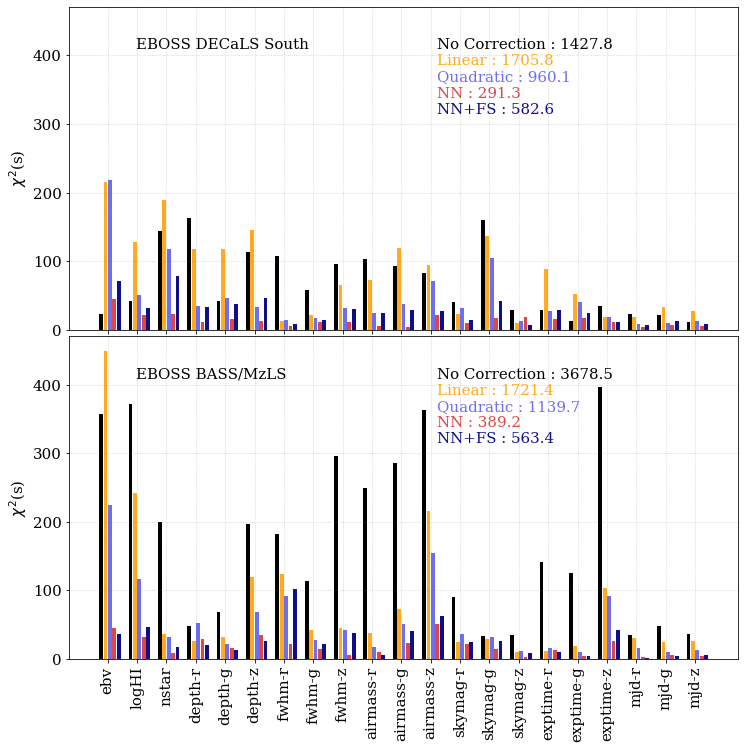

In [192]:
fig, ax = plt.subplots(nrows=2, figsize=(12, 12),
                      sharex=True, sharey=True)

fig.subplots_adjust(hspace=0.02)


regions = {'decals':'DECaLS South',
           'decaln':'DECaLS North',
           'bmzls':'BASS/MzLS'}

colors = {'uni':'k',
          'lin':'#ffaa21',
          'quad':'#6e6ef5',
          'nn':'#de4747',
          'nn-ab':'#0e0e8a'}

labels = {'uni':'No Correction',
          'lin':'Linear',
          'quad':'Quadratic',
          'nn':'NN',
          'nn-ab':'NN+FS'}

sur='eboss'
temp='ccd'

x = np.arange(21)
    
for i,region in enumerate(['decals', 'bmzls']):
    
    for j,mod in enumerate(['uni','lin', 'quad', 'nn', 'nn-ab']):
        name = '_'.join([sur, region, temp, mod])
        
        shift=0.15*(j-2) + 0.075
        ax[i].bar(x+shift, totchi2s[name][:21], 
                  width=0.13, color=colors[mod])
        
        ax[i].text(0.55, 0.87-j*0.05, 
                   f'{labels[mod]} : {sum(totchi2s[name][:21]):.1f}', 
                   color=colors[mod], 
                   transform=ax[i].transAxes)


    ax[i].grid(True, ls=':', color='grey', alpha=0.4)
    ax[i].text(0.1, 0.87, ' '.join([sur.upper(),regions[region]]),
               transform=ax[i].transAxes)
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(columns[:21], rotation=90)

    ax[i].set_ylabel(r'$\chi^{2}$(s)')
fig.savefig('chi2_eboss_ccd.pdf', bbox_inches='tight')

In [185]:
for name in totchi2s:
    print(name, sum(totchi2s[name][:21]))

eboss_decals_ccd_uni 1427.8417818839541
eboss_decals_ccd_lin 1705.8002419778134
eboss_decals_ccd_quad 960.069469848313
eboss_decals_ccd_nn 291.34311816466254
eboss_decals_ccd_nn-ab 582.5784866618577
eboss_bmzls_ccd_uni 3678.4884398490526
eboss_bmzls_ccd_lin 1721.3839830217364
eboss_bmzls_ccd_quad 1139.6832686856242
eboss_bmzls_ccd_nn 389.21225876750447
eboss_bmzls_ccd_nn-ab 563.3608744267516
